In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv', parse_dates = ['game_date'])

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

To avoid leakage, your method should only train on events that occurred prior to the shot for which you are predicting! Since this is a playground competition with public answers, it's up to you to abide by this rule.

The field names are self explanatory and contain the following attributes:

action_type
combined_shot_type
game_event_id
game_id
lat
loc_x
loc_y
lon
minutes_remaining
period
playoffs
season 
seconds_remaining
shot_distance
shot_made_flag (this is what you are predicting)
shot_type
shot_zone_area
shot_zone_basic
shot_zone_range
team_id
team_name
game_date
matchup
opponent
shot_id

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
# To divide the dataframe into train and test sets
not_null = data['shot_made_flag']*0 == 0
is_null = data['shot_made_flag']*0 != 0

In [5]:
train = data[not_null].copy()
test = data[is_null].copy()

In [6]:
# Successfully divided
print(data.shape, train.shape, test.shape)

(30697, 25) (25697, 25) (5000, 25)


In [7]:
print(train.isnull().sum(), test.isnull().sum())

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64 action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made

There are no missing values, nice.

In [8]:
###DATA VISUALIZATION

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    made = train[train['shot_made_flag']==1][feature].value_counts()
    missed = train[train['shot_made_flag']==0][feature].value_counts()
    df = pd.DataFrame([made,missed])
    df.index = ['Made','Missed']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [9]:
# FG%
train['shot_made_flag'].sum()/len(train['shot_made_flag'])

0.44616103047048294

In [10]:
train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [11]:
print(train['action_type'].value_counts())

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

There are too many types of 'action_type'. Luckily, there is 'combined_shot_type' that drastically reduces the list. Therefore, let's drop this one.

In [12]:
#delete 'action_type' column since 'combined_shot_type' is available and is more concise
train.drop('action_type', axis=1, inplace=True)
test.drop('action_type', axis=1, inplace=True)


In [13]:
train.head()
#test.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64


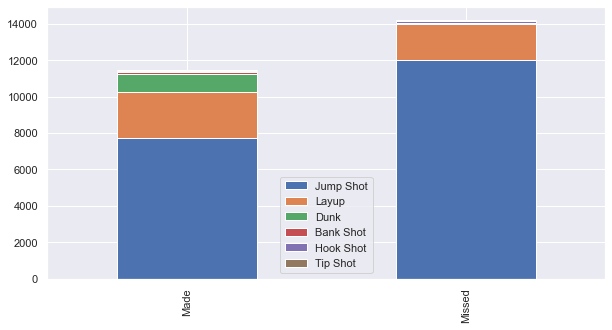

In [14]:
print(train['combined_shot_type'].value_counts())
bar_chart('combined_shot_type')

Higher chance of making a shot if it's a Dunk.
I think Layup % is more than 0.5.
Jump Shot is pretty good.

In [15]:
train.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


I don't think 'game_event_id' and 'game_id' give me anything so let's delete them.

In [16]:
train.drop(['game_event_id','game_id'], axis=1, inplace=True)
test.drop(['game_event_id','game_id'], axis=1, inplace=True)

In [17]:
train.head()

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


Again, I don't think 'team_id', 'team_name' give me much, so I'll delete them.
'matchup' might provide some good insight but there is another column called 'opponent' which will give me the exact same information so let's delete 'matchup' as well.

In [18]:
train.drop(['team_id','team_name','matchup'], axis=1, inplace=True)
test.drop(['team_id','team_name','matchup'], axis=1, inplace=True)

In [19]:
train.head()

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,shot_id
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,2
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,3
3,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,4
4,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,5
5,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,6


Let's divide 'game_date' into separate columns year, month and day. Then I will delete 'game_date' column since it's a repetitive info.

In [20]:
train["year"] = train["game_date"].dt.year
train["month"] = train["game_date"].dt.month
train["day"] = train["game_date"].dt.day
test["year"] = test["game_date"].dt.year
test["month"] = test["game_date"].dt.month
test["day"] = test["game_date"].dt.day

In [21]:
train.drop(['game_date'], axis=1, inplace=True)
test.drop(['game_date'], axis=1, inplace=True)

In [22]:
train.head()

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2,2000,10,31
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3,2000,10,31
3,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4,2000,10,31
4,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5,2000,10,31
5,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,6,2000,10,31


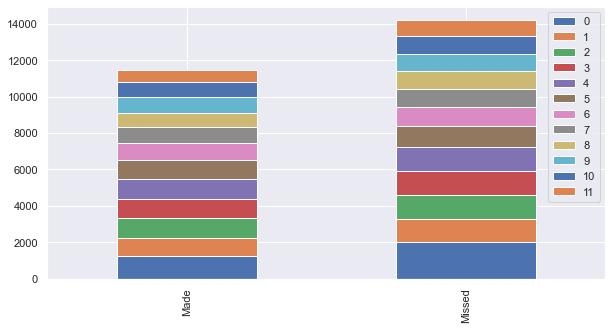

In [23]:
bar_chart('minutes_remaining')

'minutes_remaining' has too many variables for interpretation and 'seconds_remaining' is absolutely impossible to see raw. Let's categorize them into quarters. I am retaining these two columns because they could be insightful for "clutch".

In [24]:
train_test_data = [train, test]

In [25]:
# 'minutes_remaining' into (0-2): 0, (3-5): 1, (6-8): 2, (9-11): 3

#DON'T RUN THIS TWICE
for dataset in train_test_data:
    dataset.loc[ dataset['minutes_remaining'] <= 2, 'minutes_remaining'] = 0
    dataset.loc[(dataset['minutes_remaining'] > 2) & (dataset['minutes_remaining'] <= 5), 'minutes_remaining'] = 1
    dataset.loc[(dataset['minutes_remaining'] > 5) & (dataset['minutes_remaining'] <= 8), 'minutes_remaining'] = 2
    dataset.loc[ dataset['minutes_remaining'] > 8, 'minutes_remaining'] = 3

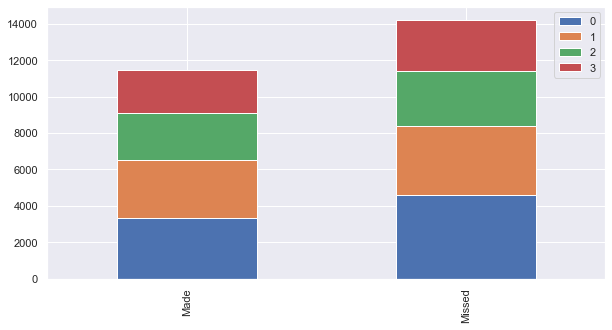

In [26]:
bar_chart('minutes_remaining')

Looks much better.
Also, I think range 1 and 2 seem closer to 0.5.

In [27]:
# 'seconds_remaining' into (0-14): 0, (15-29): 1, (30-44): 2, (44-59): 3

#DON'T RUN THIS TWICE
for dataset in train_test_data:
    dataset.loc[ dataset['seconds_remaining'] <= 14, 'seconds_remaining'] = 0
    dataset.loc[(dataset['seconds_remaining'] > 14) & (dataset['seconds_remaining'] <= 29), 'seconds_remaining'] = 1
    dataset.loc[(dataset['seconds_remaining'] > 29) & (dataset['seconds_remaining'] <= 44), 'seconds_remaining'] = 2
    dataset.loc[ dataset['seconds_remaining'] > 44, 'seconds_remaining'] = 3

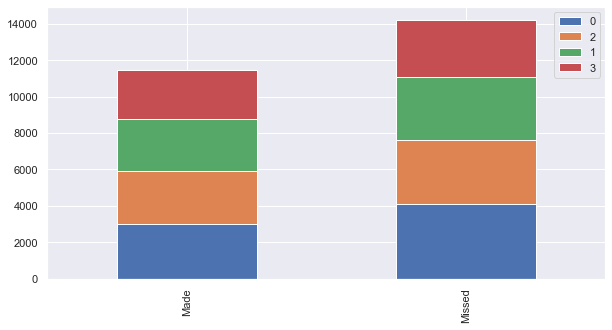

In [28]:
bar_chart('seconds_remaining')

In [29]:
train.head()

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day
1,Jump Shot,34.0443,-157,0,-118.4268,3,1,0,2000-01,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2,2000,10,31
2,Jump Shot,33.9093,-101,135,-118.3708,2,1,0,2000-01,3,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3,2000,10,31
3,Jump Shot,33.8693,138,175,-118.1318,2,1,0,2000-01,3,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4,2000,10,31
4,Dunk,34.0443,0,0,-118.2698,2,2,0,2000-01,1,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5,2000,10,31
5,Jump Shot,34.0553,-145,-11,-118.4148,3,3,0,2000-01,2,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,6,2000,10,31


I thought about keeping 'lat', 'lon', 'loc_x' and 'loc_y' to calculate the point on which Kobe made shot and work on that. However, there are columns like 'shot_zone_area' and 'shot_zone_area' that kinda give the same information. So I decided to remove those coordinates columns.

In [30]:
train.drop(['lat','lon','loc_x','loc_y'], axis=1, inplace=True)
test.drop(['lat','lon','loc_x','loc_y'], axis=1, inplace=True)

In [31]:
train.head()

,combined_shot_type,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day
1,Jump Shot,3,1,0,2000-01,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2,2000,10,31
2,Jump Shot,2,1,0,2000-01,3,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3,2000,10,31
3,Jump Shot,2,1,0,2000-01,3,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4,2000,10,31
4,Dunk,2,2,0,2000-01,1,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5,2000,10,31
5,Jump Shot,3,3,0,2000-01,2,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,6,2000,10,31


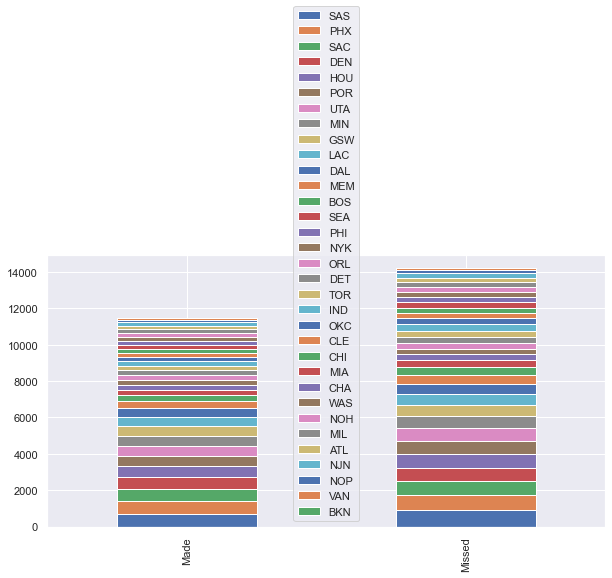

In [32]:
bar_chart('opponent')

I thought about keeping 'opponent' because Kobe could've been dominant agaisnt certain teams, however looking at the chart, I don't think I can make something out of it. So I decided to remove 'opponent' as well.

In [33]:
train.drop(['opponent'], axis=1, inplace=True)
test.drop(['opponent'], axis=1, inplace=True)

In [34]:
train.head()

,combined_shot_type,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,year,month,day
1,Jump Shot,3,1,0,2000-01,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2,2000,10,31
2,Jump Shot,2,1,0,2000-01,3,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,3,2000,10,31
3,Jump Shot,2,1,0,2000-01,3,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,4,2000,10,31
4,Dunk,2,2,0,2000-01,1,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,5,2000,10,31
5,Jump Shot,3,3,0,2000-01,2,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,6,2000,10,31


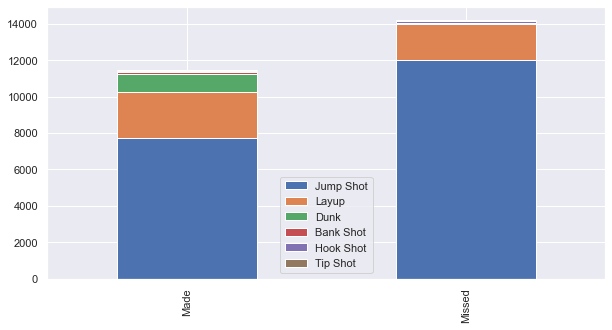

In [35]:
### FEATURE ENGINEERING

## 'combined_shot_type'
bar_chart('combined_shot_type')

In [36]:
#'Jump Shot': 0, 'Dunk': 1, 'Layup': 2, 'Others': 3
mapping = {'Jump Shot': 0, 'Dunk': 1, 'Layup': 2, 'Tip Shot': 3, 'Hook Shot': 3, 'Bank Shot': 3}

for dataset in train_test_data:
    dataset['combined_shot_type'] = dataset['combined_shot_type'].map(mapping)

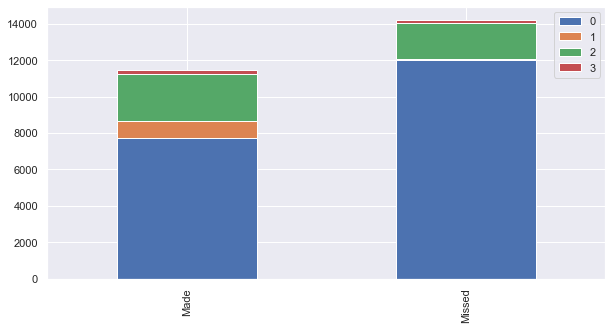

In [37]:
bar_chart('combined_shot_type')

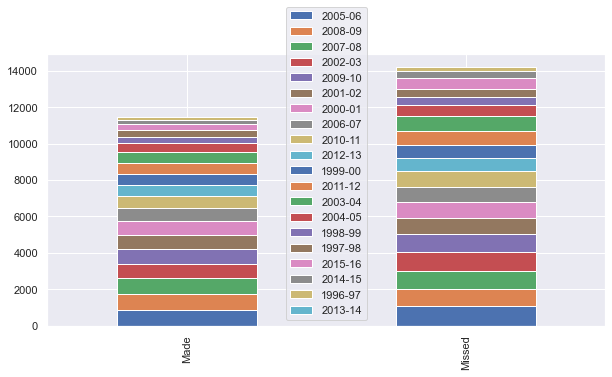

In [38]:
## 'season'
bar_chart('season')

Let's divide the season where Kobe had a HOT season or OKAY or BAD. The distinction between these three is totally of my judgement.

In [39]:
season_list = list(data['season'].unique())

for i in season_list:
    which_season = train[train['season'] == i]
    print(i, ":", round(which_season['shot_made_flag'].sum()/len(which_season),2))

2000-01 : 0.47
2001-02 : 0.46
2002-03 : 0.44
2003-04 : 0.43
2004-05 : 0.44
2005-06 : 0.45
2006-07 : 0.46
2007-08 : 0.47
2008-09 : 0.47
2009-10 : 0.45
2010-11 : 0.45
2011-12 : 0.43
2012-13 : 0.46
2013-14 : 0.41
2014-15 : 0.38
2015-16 : 0.36
1996-97 : 0.42
1997-98 : 0.43
1998-99 : 0.46
1999-00 : 0.46


I'll say, >=0.45: HOT, <0.45: OKAY, <0.40 : BAD

In [40]:
#HOT season: 0, OKAY season: 1, BAD season: 2
mapping = {'2000-01': 0, '2001-02': 0, '2001-02': 1, '2002-03': 1, '2003-04': 1, '2004-05': 1,
          '2005-06': 0, '2006-07': 0, '2007-08': 0, '2008-09': 0, '2009-10': 0, '2010-11': 0,
          '2011-12': 1, '2012-13': 0, '2013-14': 1, '2014-15': 2, '2015-16': 2, '1996-97': 1,
          '1997-98': 1, '1998-99': 0, '1999-00': 0}

for dataset in train_test_data:
    dataset['season'] = dataset['season'].map(mapping)

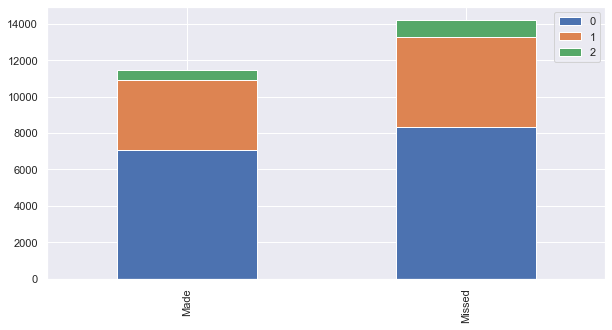

In [41]:
bar_chart('season')

I just realized 'shot_distance' is a repetitive information as well because there is 'shot_zone_basic' and 'shot_zone_range' that perfectly describe it instead. I will therefore delete 'shot_distance' column.

In [42]:
train.drop('shot_distance', axis=1, inplace=True)
test.drop('shot_distance', axis=1, inplace=True)

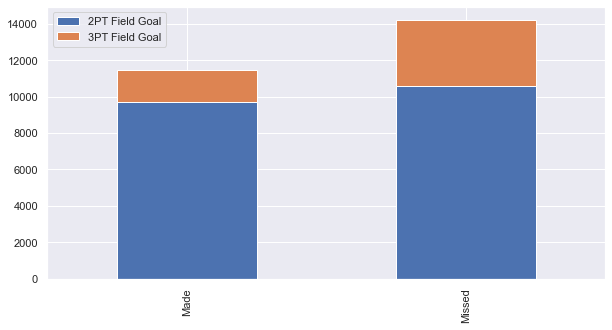

In [43]:
## 'shot_type'

bar_chart('shot_type')

In [44]:
#'2PT Field Goal': 0, '3PT Field Goal': 1
mapping = {'2PT Field Goal': 0, '3PT Field Goal': 1}

for dataset in train_test_data:
    dataset['shot_type'] = dataset['shot_type'].map(mapping)

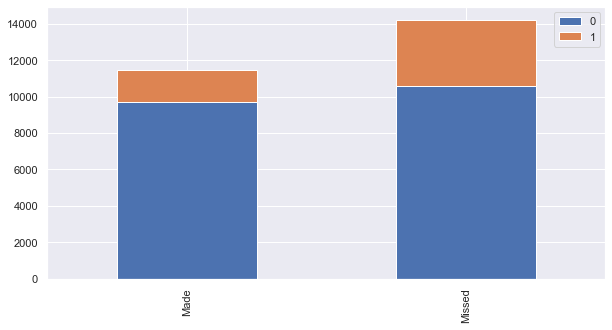

In [45]:
bar_chart('shot_type')

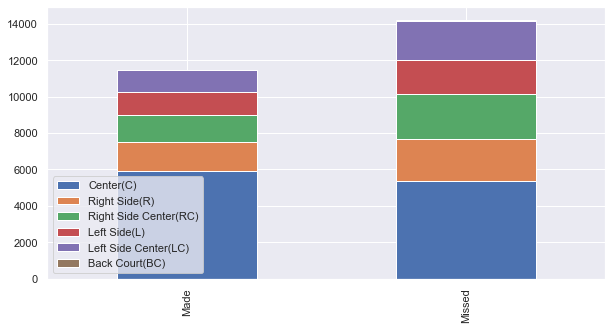

In [46]:
## 'shot_zone_area'

bar_chart('shot_zone_area')

In [47]:
#Center: 0, Right side(+RC): 1, Left side(+LC and Back Court): 2
mapping = {'Center(C)': 0, 'Back Court(BC)': 2, 'Right Side(R)': 1, 'Right Side Center(RC)': 1,
          'Left Side(L)': 2, 'Left Side Center(LC)': 2}

for dataset in train_test_data:
    dataset['shot_zone_area'] = dataset['shot_zone_area'].map(mapping)

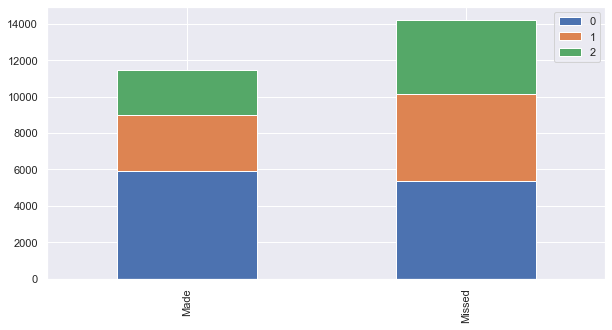

In [48]:
bar_chart('shot_zone_area')

Looks like Kobe was more dominant on the right side than on the left side. Kobe made more shots at the center than missing.
Since, Back Court shot is very difficult, I put it at the left side which is Kobe's weak side.

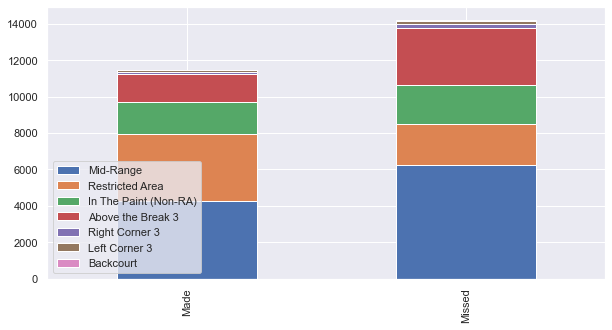

In [49]:
## 'shot_zone_basic'

bar_chart('shot_zone_basic')

In [50]:
#Mid_Range: 0, Restricted Area: 1, In The Paint: 2, Above the Break 3 + others: 3
mapping = {'Mid-Range': 0, 'Restricted Area': 1, 'In The Paint (Non-RA)': 2, 'Backcourt': 3, 
           'Above the Break 3': 3, 'Right Corner 3': 3, 'Left Corner 3': 3}

for dataset in train_test_data:
    dataset['shot_zone_basic'] = dataset['shot_zone_basic'].map(mapping)

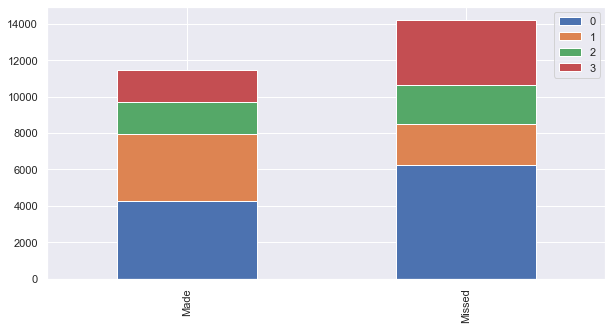

In [51]:
bar_chart('shot_zone_basic')

I put 'Backcourt' in the 3 point area because it's a tough shot to make.

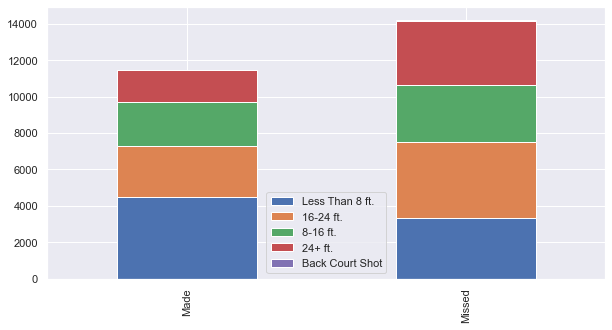

In [52]:
## shot_zone_range

bar_chart('shot_zone_range')

In [53]:
data['shot_zone_range'].unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [54]:
# Less Than 8 ft.: 0, 16-24 ft.: 1, 8-16 ft: 2, 24+ ft. (+ Back Court Shot): 3
mapping = {'Less Than 8 ft.': 0, '16-24 ft.': 1, '8-16 ft.': 2, '24+ ft.': 3, 
           'Back Court Shot': 3}

for dataset in train_test_data:
    dataset['shot_zone_range'] = dataset['shot_zone_range'].map(mapping)

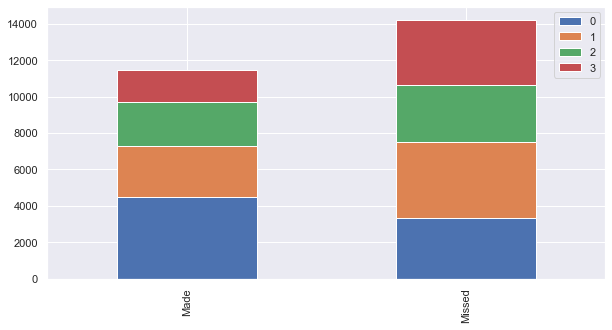

In [55]:
bar_chart('shot_zone_range')

I put 'Back Court Shot' as  24+ ft. shots because it's a tough shot to make.

In [56]:
train.head(20)
test.head(20)

,combined_shot_type,minutes_remaining,period,playoffs,season,seconds_remaining,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,year,month,day
0,0,3,1,0,0,1,NaN,0,1,0,1,1,2000,10,31
7,0,2,3,0,0,0,NaN,0,0,1,0,8,2000,10,31
16,2,0,1,0,0,0,NaN,0,0,1,0,17,2000,11,1
19,2,3,3,0,0,3,NaN,0,0,1,0,20,2000,11,1
32,0,3,1,0,0,1,NaN,0,1,0,1,33,2000,11,4
33,0,3,1,0,0,3,NaN,0,1,0,1,34,2000,11,4
34,2,2,1,0,0,2,NaN,0,0,1,0,35,2000,11,4
35,2,1,1,0,0,3,NaN,0,0,1,0,36,2000,11,4
36,2,1,1,0,0,0,NaN,0,0,1,0,37,2000,11,4
37,0,1,2,0,0,2,NaN,0,2,0,1,38,2000,11,4


The shots we are trying to predict is actually all over the time period. Which means to avoid leakage, I cannot use the whole data set but only those that are prior to the date of the shot. However, as I'm still quite new to whatever this is, I will simply ignore it. Therefore, I no longer need 'year', 'month' and 'day' columns.

In [57]:
train.drop(['year','month','day','minutes_remaining','period','playoffs','seconds_remaining','shot_zone_basic'], axis=1, inplace=True)
test.drop(['year','month','day','minutes_remaining','period','playoffs','seconds_remaining','shot_zone_basic'], axis=1, inplace=True)

In [58]:
train.head(20)

,combined_shot_type,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_range,shot_id
1,0,0,0.0,0,2,2,2
2,0,0,1.0,0,2,1,3
3,0,0,0.0,0,1,1,4
4,1,0,1.0,0,0,0,5
5,0,0,0.0,0,2,2,6
6,2,0,1.0,0,0,0,7
8,0,0,1.0,0,2,2,9
9,0,0,0.0,0,0,2,10
10,0,0,0.0,1,2,3,11
11,0,0,1.0,0,1,1,12


In [59]:
# Now let's make the data available for modelling
# we divide train_data and target for Cross Validation?

train_data = train.drop('shot_made_flag', axis=1)
target = train['shot_made_flag']
test.drop('shot_made_flag', axis=1, inplace=True)  #Doesn't even need it because its NaN

print(train_data.shape, target.shape)

#Made it into a feature vector

train_data.head(10)

(25697, 6) (25697,)


,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_range,shot_id
1,0,0,0,2,2,2
2,0,0,0,2,1,3
3,0,0,0,1,1,4
4,1,0,0,0,0,5
5,0,0,0,2,2,6
6,2,0,0,0,0,7
8,0,0,0,2,2,9
9,0,0,0,0,2,10
10,0,0,1,2,3,11
11,0,0,0,1,1,12


In [60]:
###MODELLING

# Importing Classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



##CROSS VALIDATION (K-FOLD)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [61]:
##KNN

clf = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


#we use the mean of the scores(and into percentage)

print("\n",round(np.mean(score)*100, 2))

[0.53035019 0.52217899 0.52762646 0.52412451 0.53463035 0.52762646
 0.52451362 0.52004671 0.5103153  0.51576489]

 52.37


In [62]:
##Decision Tree

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print("\n",round(np.mean(score)*100, 2))

[0.5233463  0.52879377 0.5229572  0.52840467 0.5463035  0.53657588
 0.51789883 0.53289218 0.52432853 0.52160374]

 52.83


In [63]:
##Random Forest

clf = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print("\n",round(np.mean(score)*100, 2))

[0.52723735 0.53190661 0.54280156 0.52607004 0.54747082 0.53268482
 0.53501946 0.54145582 0.52783184 0.53950954]

 53.52


In [64]:
##Naive Bayes

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print("\n",round(np.mean(score)*100, 2))

[0.58715953 0.58949416 0.59143969 0.60116732 0.59922179 0.59727626
 0.60311284 0.58466329 0.60062281 0.59283768]

 59.47


##SVM

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print("\n",round(np.mean(score)*100, 2))

import os
os.system('say "프로그램이 정상 종료되었습니다."')

Looks like Naive Bayes yielded the best score.

In [65]:
###TESTING

clf = GaussianNB()
clf.fit(train_data, target)

prediction = clf.predict(test)

#a format required for submission
submission = pd.DataFrame({
        "shot_id": test["shot_id"],
        "shot_made_flag": prediction
    })

#let's make it into a csv file for submission!
submission.to_csv('submission.csv', index=False)

In [66]:
submission = pd.read_csv('submission.csv')
submission.head(20)

,shot_id,shot_made_flag
0,1,0.0
1,8,1.0
2,17,1.0
3,20,1.0
4,33,0.0
5,34,0.0
6,35,1.0
7,36,1.0
8,37,1.0
9,38,0.0
